# Using HTM with FESTIM #

Another helpful feature we show is how to integrate FESTIM with HTM. H-transport-materials (HTM) is a python library for accessing hydrogen transport properties such as diffusivities, solubilities, recombination coefficients, etc. It is an __[open-source project](https://github.com/RemDelaporteMathurin/h-transport-materials)__. and contributions to the database are more than welcome! See the online dashboard __[here](https://htm-dashboard-uan5l4xr6a-od.a.run.app/)__!

Objectives:
* Learn how to install and use the HTM library
* Learn how to use and integrate HTM in FESTIM

## Using the HTM Library ##

First, install HTM by running: 

` pip install h-transport-materials `

Now that HTM is installed, let's look at at the HTM api.

The diffusivities in the HTM database are stored in ` htm.diffusivities `. They can be filtered by material, isotope, author, year with the ` .filter() ` method. 

Let's plot the different diffusivities for tungsten:

/home/ckhurana/anaconda3/envs/festim-workshop/lib/python3.13/site-packages/pybtex/plugin/__init__.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


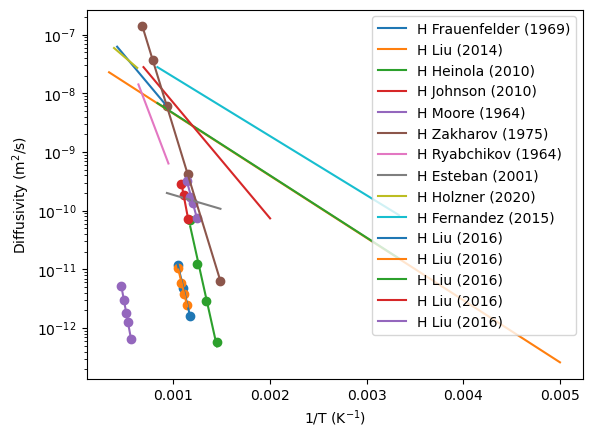

In [1]:
import h_transport_materials as htm

# filter only tungsten and H
diffusivities = htm.diffusivities.filter(material="tungsten").filter(isotope="h")


# plot the properties
htm.plotting.plot(diffusivities)

import matplotlib.pyplot as plt

plt.yscale("log")
plt.ylabel("Diffusivity (m$^2$/s)")
plt.legend()
plt.show()

Now let's take a look at the different solubilities for tungsten:

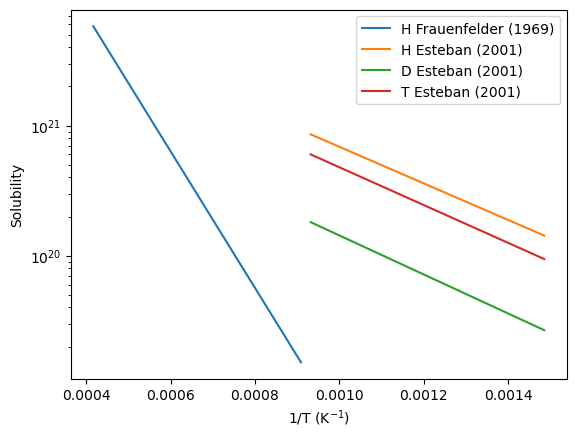

In [2]:
plt.figure()
# filter only tungsten and H
solubilities = htm.solubilities.filter(material="tungsten")

htm.plotting.plot(solubilities)


plt.yscale("log")
plt.ylabel("Solubility")
plt.legend()
plt.show()

## Integrating with FESTIM ##

To use HTM in FESTIM, we should first specify an author to get specific material properties. For example, let's look at tungsten properties from Frauenfelder. We can filter the properties with `.filter(author="frauenfelder")`, obtaining a single `htm.ArrheniusProperty object`:

In [3]:
diffusivities = htm.diffusivities.filter(material="tungsten").filter(isotope="h").filter(author="frauenfelder")
D = diffusivities[0]

print(type(diffusivities))
print(type(D))

<class 'h_transport_materials.properties_group.PropertiesGroup'>
<class 'h_transport_materials.property.Diffusivity'>


A `htm.ArrheniusProperty` object has several useful attributes like `.pre_exp` which holds the pre-exponential factor, `.act_energy` for the activation energy but also `.author` and `.year`:

In [4]:
print(D)


        Author: Frauenfelder
        Material: tungsten
        Year: 1969
        Isotope: H
        Pre-exponential factor: 4.10×10⁻⁷ m²/s
        Activation energy: 3.90×10⁻¹ eV/particle
        


We can also look at the solubility:

In [5]:
S = htm.solubilities.filter(material="tungsten").filter(author="frauenfelder")[0]
print(S)


        Author: Frauenfelder
        Material: tungsten
        Year: 1969
        Isotope: H
        Pre-exponential factor: 8.88×10²³ particle/m³/Pa⁰⋅⁵
        Activation energy: 1.04×10⁰ eV/particle
        


These properties can then be used inside a `FESTIM.Material` object. This is extremely useful to avoid silly copy-pasting mistakes and typos in simulations.

In [6]:
import festim as F

tungsten = F.Material(
    D_0=D.pre_exp.magnitude, E_D=D.act_energy.magnitude,
    K_S_0=S.pre_exp.magnitude, E_K_S=S.act_energy.magnitude
    )

print(tungsten)